<a href="https://www.kaggle.com/code/violetmakena/which-car-should-i-buy-petrol-vs-diesel?scriptVersionId=128895771" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
#import necessary modules needed for exploratoer data analysis 
import pandas as pd
#working and manupulating datasets 
import matplotlib.pyplot as plt
#visualisation
import seaborn as sns
#visualisations
import numpy as np
#perform numerical calculations
from scipy.stats import norm
#normalisation of the data 
from sklearn.preprocessing import StandardScaler
#standardize data
from scipy import stats
#statistical insights
import seaborn as sns

# Loading the data 

In [2]:
#import data 
car_df = pd.read_csv('/kaggle/input/cardekho/car data (1).csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Understanding and describing the data 

In [3]:
#learning about the data 
car_df.shape


(301, 9)

# Cleaning and Wrangling 

In [4]:
#looking for missing or null figures 
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
#checking for unique variables 
car_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [6]:
car_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
#describing the data
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The data contains information on 301 used cars, including their year of manufacture, selling price, present price, kilometers driven, and number of previous owners. The mean selling price of the cars is 4.66, while the mean present price is 7.63. The standard deviation for selling price is 5.08, and for present price is 8.64. The minimum and maximum selling prices are 0.1 and 35, respectively. The minimum and maximum present prices are 0.32 and 92.6, respectively. The cars have been driven a mean of 36,947 kilometers, with a standard deviation of 38,886 kilometers. On average, the cars have had less than one previous owner, with a mean of 0.043 and a standard deviation of 0.248. The data covers a range of years from 2003 to 2018, with a mean year of 2013.6.

# Descriptive statistics 

In [8]:
# get the row with the least Kms_driven
least_kms_row = car_df.loc[car_df['Kms_Driven'].idxmin()]

# calculate the average price of the least Kms_driven
avg_price = (least_kms_row['Selling_Price'] + least_kms_row['Present_Price']) / 2

print(f"The average price of the least Kms_driven is {avg_price:.2f}")

#The idxmin() method is used to get the index of the row with the least Kms_driven, and the loc[] method is used to 
#get the row itself. Finally, the average price is calculated as the average of Selling_Price and Present_Price of the selected row.

The average price of the least Kms_driven is 0.83


<AxesSubplot:xlabel='Selling_Price'>

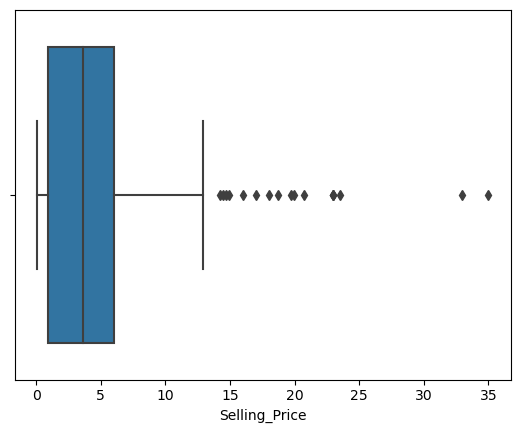

In [9]:
# plot a box plot of the car prices
sns.boxplot(x="Selling_Price", data=car_df)


<AxesSubplot:xlabel='Present_Price'>

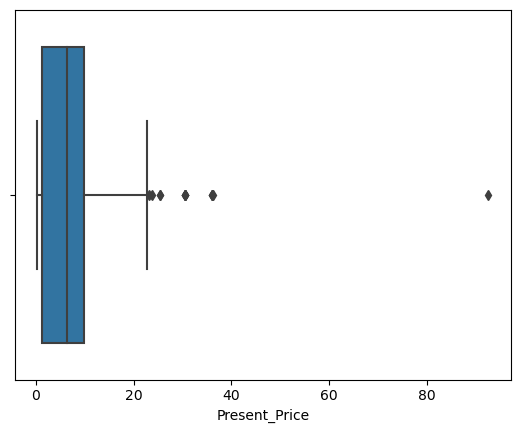

In [10]:
sns.boxplot(x="Present_Price", data=car_df)

<AxesSubplot:>

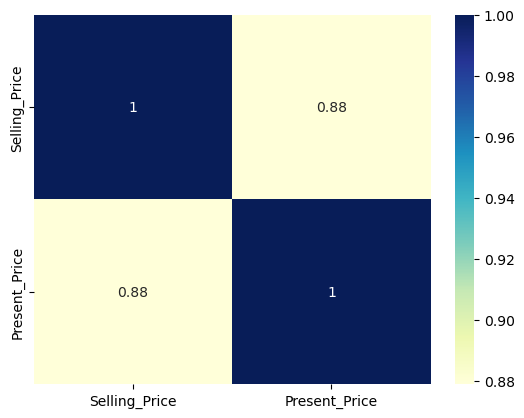

In [11]:
# select only the selling price and present price variables
car_prices = car_df[["Selling_Price", "Present_Price"]]

# create a correlation plot using Seaborn The annot=True parameter adds the correlation coefficients to the plot and the cmap="YlGnBu" parameter sets the color scheme.
sns.heatmap(car_prices.corr(), annot=True, cmap="YlGnBu")

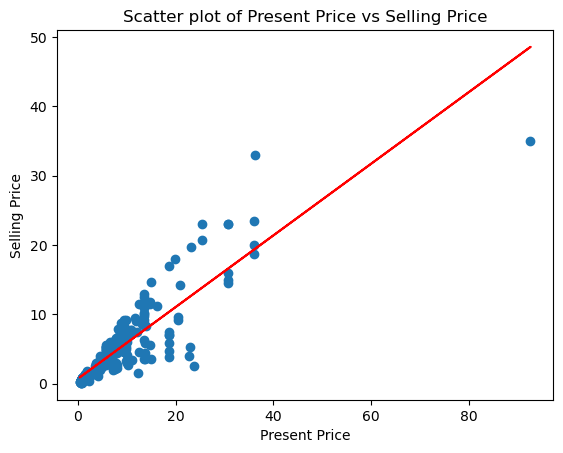

Slope: 0.5168490273953966
Intercept: 0.7185274709817677
R-value: 0.878982545161495
P-value: 3.602186428728175e-98
Standard error: 0.01621560805582324


In [12]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# select only the selling price and present price variables
car_prices = car_df[["Selling_Price", "Present_Price"]]

# create a scatter plot using Matplotlib
plt.scatter(car_prices["Present_Price"], car_prices["Selling_Price"])
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.title("Scatter plot of Present Price vs Selling Price")

# perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(car_prices["Present_Price"], car_prices["Selling_Price"])

# add regression line to plot
plt.plot(car_prices["Present_Price"], slope * car_prices["Present_Price"] + intercept, color='red')

# display plot
plt.show()

# print regression parameters
print("Slope: {}".format(slope))
print("Intercept: {}".format(intercept))
print("R-value: {}".format(rvalue))
print("P-value: {}".format(pvalue))
print("Standard error: {}".format(stderr))


The data shows the results of a linear regression analysis between the selling price and present price of cars. 
* The slope of 0.5168 indicates that for every one unit increase in the present price of a car, the selling price increases by approximately 0.52 units. 
* The intercept of 0.7185 indicates that when the present price is zero, the expected selling price is around 0.72 units.
* The r-value of 0.879 indicates a strong positive correlation between the selling price and present price, meaning that as the present price increases, the selling price tends to increase as well. 
* The p-value of 3.602e-98 is less than 0.05, which means that the results are statistically significant, indicating that the relationship between selling price and present price is not likely to be due to chance.
* Finally, the standard error of 0.0162 indicates the average distance that the observed values deviate from the predicted values.

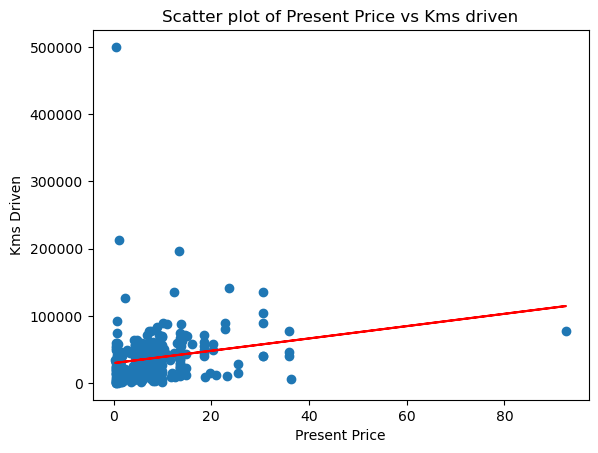

Slope: 916.1375335865974
Intercept: 29958.476676094557
R-value: 0.20364703400913242
P-value: 0.0003768647131931853
Standard error: 254.7119782366184


In [13]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# select only the selling price and present price variables
car_driven = car_df[["Kms_Driven", "Present_Price"]]

# create a scatter plot using Matplotlib
plt.scatter(car_driven["Present_Price"], car_driven["Kms_Driven"])
plt.xlabel("Present Price")
plt.ylabel("Kms Driven")
plt.title("Scatter plot of Present Price vs Kms driven")

# perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(car_driven["Present_Price"], car_driven["Kms_Driven"])

# add regression line to plot
plt.plot(car_driven["Present_Price"], slope * car_driven["Present_Price"] + intercept, color='red')

# display plot
plt.show()

# print regression parameters
print("Slope: {}".format(slope))
print("Intercept: {}".format(intercept))
print("R-value: {}".format(rvalue))
print("P-value: {}".format(pvalue))
print("Standard error: {}".format(stderr))

The given data is from a linear regression analysis that examines the relationship between the kilometers driven and the present price of a car. 

**- Slope: 916.1375335865974**
The slope of the regression line indicates that for every unit increase in kilometers driven, the present price of the car increases by 916.13.

**- Intercept: 29958.476676094557**
The intercept is the value of the dependent variable (present price) when the independent variable (kilometers driven) is zero. In this case, the intercept suggests that a car with zero kilometers driven would have a present price of around 29,958.48.

**- R-value: 0.20364703400913242**
The R-value (correlation coefficient) indicates the strength and direction of the linear relationship between the two variables. In this case, the R-value is positive, suggesting that there is a weak positive linear relationship between the kilometers driven and the present price of the car.

**- P-value: 0.0003768647131931853**
The P-value represents the probability of obtaining the observed results of a statistical test, assuming that there is no real relationship between the variables. A small P-value (less than 0.05) suggests that the relationship is statistically significant. In this case, the P-value is very small, indicating that there is a statistically significant relationship between kilometers driven and present price.

**- Standard error: 254.7119782366184**
The standard error is a measure of the precision of the regression coefficient estimate. In this case, the standard error of the slope indicates that the estimate of the slope is expected to be off by around 254.71 units, on average.

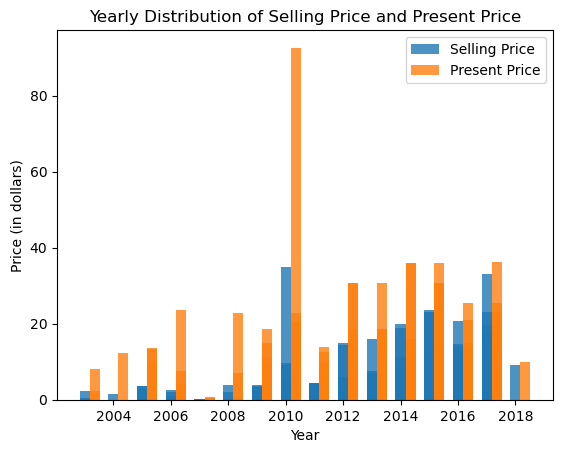

In [14]:
# select only the selling price and present price variables
car_type = car_df[["Year", "Present_Price", "Selling_Price"]]

bar_width = 0.35
opacity = 0.8

plt.bar(car_type["Year"], car_type["Selling_Price"], bar_width,
        alpha=opacity,
        label='Selling Price')

plt.bar(np.array(car_type["Year"]) + bar_width, car_type["Present_Price"], bar_width,
        alpha=opacity,
        label='Present Price')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Price (in dollars)')
plt.title('Yearly Distribution of Selling Price and Present Price')

# Add legend
plt.legend()

# Show the plot
plt.show()


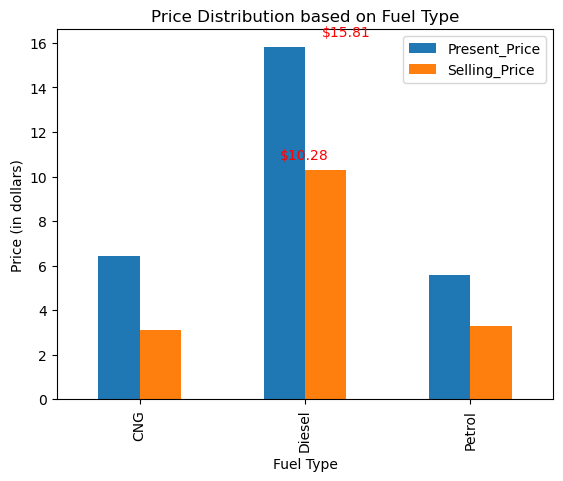

In [15]:
import matplotlib.pyplot as plt

car_fueltype = car_df[["Fuel_Type", "Present_Price", "Selling_Price"]]

# group data by fuel type and compute mean prices
fueltype_mean = car_fueltype.groupby("Fuel_Type").mean()

# plot bar charts for present price and selling price by fuel type
ax = fueltype_mean.plot.bar(y=["Present_Price", "Selling_Price"])
plt.xlabel("Fuel Type")
plt.ylabel("Price (in dollars)")
plt.title("Price Distribution based on Fuel Type")

# add annotations for highest selling price and present price
for i, (index, row) in enumerate(fueltype_mean.iterrows()):
    max_selling_price = row["Selling_Price"] == fueltype_mean["Selling_Price"].max()
    max_present_price = row["Present_Price"] == fueltype_mean["Present_Price"].max()
    
    if max_selling_price:
        ax.annotate(f"${row['Selling_Price']:.2f}", xy=(i-0.15, row['Selling_Price']+0.5), color='red')
        
    if max_present_price:
        ax.annotate(f"${row['Present_Price']:.2f}", xy=(i+0.1, row['Present_Price']+0.5), color='red')

plt.show()


# Inferential Statistics 

In [16]:
# select relevant columns
car_price = car_df[["Year", "Fuel_Type", "Present_Price", "Selling_Price"]]

car_price.head()

,Year,Fuel_Type,Present_Price,Selling_Price
0,2014,Petrol,5.59,3.35
1,2013,Diesel,9.54,4.75
2,2017,Petrol,9.85,7.25
3,2011,Petrol,4.15,2.85
4,2014,Diesel,6.87,4.60


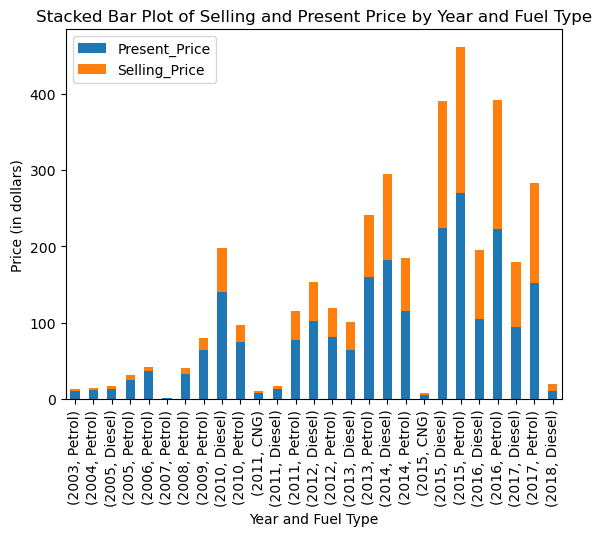

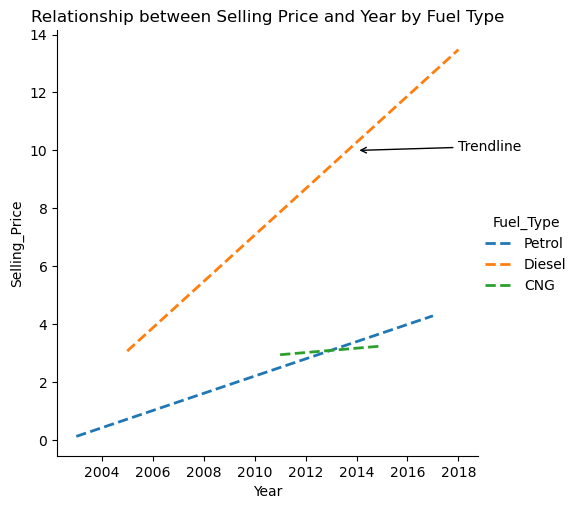

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# select relevant columns
car_price = car_df[["Year", "Fuel_Type", "Present_Price", "Selling_Price"]]

# group data by year and fuel type and aggregate by sum
grouped_data = car_price.groupby(["Year", "Fuel_Type"]).sum()

# create stacked bar plot
ax = grouped_data.plot(kind="bar", stacked=True)

# add axis labels and title
plt.xlabel("Year and Fuel Type")
plt.ylabel("Price (in dollars)")
plt.title("Stacked Bar Plot of Selling and Present Price by Year and Fuel Type")

# add trendline
sns.lmplot(x="Year", y="Selling_Price", hue="Fuel_Type", data=car_price, order=1, ci=None, scatter=False, line_kws={"linestyle":"--", "linewidth":2})

# add label to trendline
plt.annotate("Trendline", xy=(2014, 10), xytext=(2018, 10), arrowprops=dict(facecolor='black', arrowstyle="->"))

# add title
plt.title("Relationship between Selling Price and Year by Fuel Type")

plt.show()


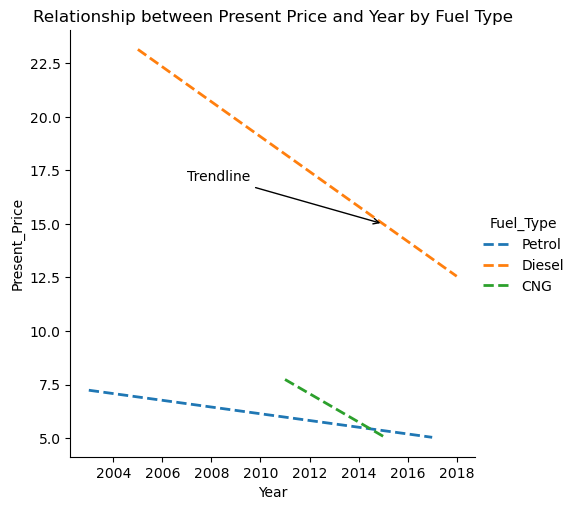

In [18]:
# add trendline
sns.lmplot(x="Year", y="Present_Price", hue="Fuel_Type", data=car_price, order=1, ci=None, scatter=False, line_kws={"linestyle":"--", "linewidth":2})

# add label to trendline
plt.annotate("Trendline", xy=(2015, 15), xytext=(2007, 17), arrowprops=dict(facecolor='black', arrowstyle="->"))

# add title
plt.title("Relationship between Present Price and Year by Fuel Type")

plt.show()


As the years progress, disel cars are less popular, the trend lines show that prices for car resale decreases overtime and its cheaper getting a car on resale than buying a new car in the same year. CNG cars are the least popular and are rarely resold. 

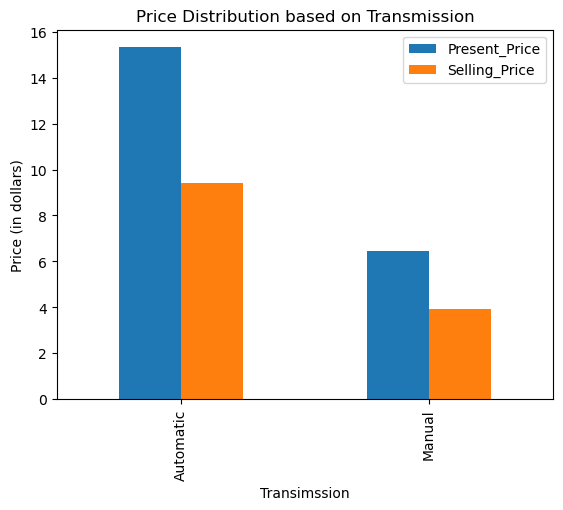

In [19]:
car_transtype = car_df[["Transmission", "Present_Price", "Selling_Price"]]

# group data by fuel type and compute mean prices
transtype_mean = car_transtype.groupby("Transmission").mean()

# plot bar charts for present price and selling price by fuel type
transtype_mean.plot.bar(y=["Present_Price", "Selling_Price"])
plt.xlabel("Transimssion")
plt.ylabel("Price (in dollars)")
plt.title("Price Distribution based on Transmission")
plt.show()


As per the analysis on the car dataset, it is observed that the selling price of used cars is highly dependent on its initial selling price. Additionally, it is also observed that the present price of a car, the fuel type, and the transmission type also play a significant role in determining the selling price of a car.

Based on this analysis, it is recommended that the client should consider the initial selling price, the present price, the fuel type, and the transmission type of a car while making a decision to buy or sell a used car. The client should also keep in mind that the resale value of a car depreciates over time and it is advisable to sell a car within the first 5 years of purchase to get a good resale value.

In [20]:
import pandas as pd

# select relevant columns
car_pricechange = car_df.loc[:, ["Year", "Fuel_Type", "Present_Price", "Selling_Price"]]

# add new column for price change
car_pricechange["Price_change"] = car_pricechange["Present_Price"] - car_pricechange["Selling_Price"]

# display DataFrame with new column
car_pricechange.head()


,Year,Fuel_Type,Present_Price,Selling_Price,Price_change
0,2014,Petrol,5.59,3.35,2.24
1,2013,Diesel,9.54,4.75,4.79
2,2017,Petrol,9.85,7.25,2.60
3,2011,Petrol,4.15,2.85,1.30
4,2014,Diesel,6.87,4.60,2.27


Analysis on the effect of price change 

In [21]:
car_pricechange.describe()

,Year,Present_Price,Selling_Price,Price_change
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,4.661296,2.967176
std,2.891554,8.644115,5.082812,4.828771
min,2003.000000,0.320000,0.100000,0.030000
25%,2012.000000,1.200000,0.900000,0.390000
50%,2014.000000,6.400000,3.600000,1.640000
75%,2016.000000,9.900000,6.000000,3.350000
max,2018.000000,92.600000,35.000000,57.600000


In [22]:
car_pricechange.head()


,Year,Fuel_Type,Present_Price,Selling_Price,Price_change
0,2014,Petrol,5.59,3.35,2.24
1,2013,Diesel,9.54,4.75,4.79
2,2017,Petrol,9.85,7.25,2.60
3,2011,Petrol,4.15,2.85,1.30
4,2014,Diesel,6.87,4.60,2.27


These are regression parameters for two linear regression models performed on the price change data for petrol and diesel fuel types.

For the petrol regression, the slope is -0.0048537364584326104, which means that for every unit increase in the index (year), the price change decreases by approximately 0.0049 units. The intercept is 3.0942236855022505, which means that if the index is zero (i.e., the year is the reference year), the expected price change is 3.0942. The r-value is -0.1193744690838445, which indicates a weak negative correlation between the index and price change. The p-value is 0.06541628740652836, which is above the conventional significance level of 0.05, indicating that we cannot reject the null hypothesis that the slope of the regression line is zero. The standard error is 0.002622248831568747, which measures the variability of the slope estimate.

For the diesel regression, the slope is -0.012263247097405451, which means that for every unit increase in the index (year), the price change decreases by approximately 0.0123 units. The intercept is 6.955062076621434, which means that if the index is zero (i.e., the year is the reference year), the expected price change is 6.9551. The r-value is -0.14675081971964907, which indicates a weak negative correlation between the index and price change. The p-value is 0.2631890749006566, which is above the conventional significance level of 0.05, indicating that we cannot reject the null hypothesis that the slope of the regression line is zero. The standard error is 0.010853840020485808, which measures the variability of the slope estimate.

In [23]:
import scipy.stats as stats

# select data for petrol fuel type
petrol_data = car_pricechange[car_pricechange["Fuel_Type"] == "Petrol"]["Price_change"]

# select data for diesel fuel type
diesel_data = car_pricechange[car_pricechange["Fuel_Type"] == "Diesel"]["Price_change"]

# perform linear regression on petrol data
slope_p, intercept_p, rvalue_p, pvalue_p, stderr_p = stats.linregress(petrol_data.index, petrol_data)

# perform linear regression on diesel data
slope_d, intercept_d, rvalue_d, pvalue_d, stderr_d = stats.linregress(diesel_data.index, diesel_data)

# print regression parameters
print("Petrol regression: slope={}, intercept={}, rvalue={}, pvalue={}, stderr={}".format(slope_p, intercept_p, rvalue_p, pvalue_p, stderr_p))
print("Diesel regression: slope={}, intercept={}, rvalue={}, pvalue={}, stderr={}".format(slope_d, intercept_d, rvalue_d, pvalue_d, stderr_d))


Petrol regression: slope=-0.0048537364584326104, intercept=3.0942236855022505, rvalue=-0.1193744690838445, pvalue=0.06541628740652836, stderr=0.002622248831568747
Diesel regression: slope=-0.012263247097405451, intercept=6.955062076621434, rvalue=-0.14675081971964907, pvalue=0.2631890749006566, stderr=0.010853840020485808


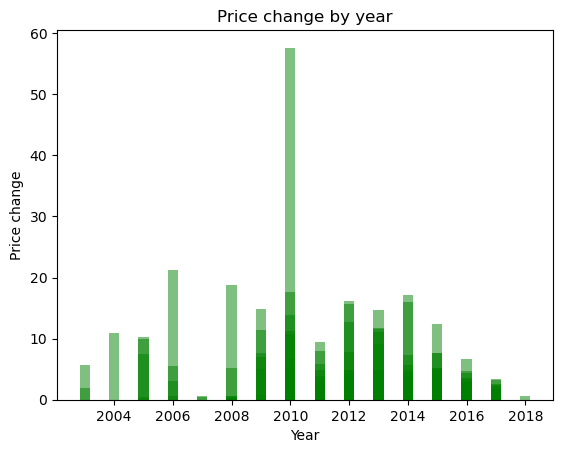

In [24]:
import matplotlib.pyplot as plt

# define bar width
bar_width = 0.35

# plot bar chart for price change by year
plt.bar(car_pricechange["Year"], car_pricechange["Price_change"], width=bar_width, alpha=0.5, color="green")

# set x-axis label
plt.xlabel("Year")

# set y-axis label
plt.ylabel("Price change")

# set plot title
plt.title("Price change by year")

# display plot
plt.show()


Decision 

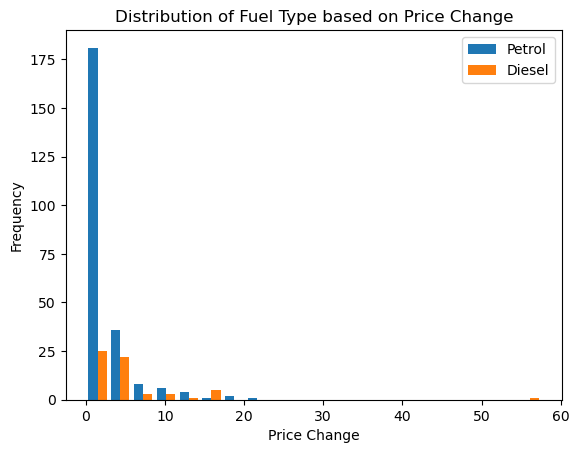

In [25]:
import matplotlib.pyplot as plt

# select data for petrol fuel type
petrol_data = car_pricechange[car_pricechange["Fuel_Type"] == "Petrol"]["Price_change"]

# select data for diesel fuel type
diesel_data = car_pricechange[car_pricechange["Fuel_Type"] == "Diesel"]["Price_change"]

# set up plot
plt.hist([petrol_data, diesel_data], bins=20, label=["Petrol", "Diesel"])

# add labels and title
plt.xlabel("Price Change")
plt.ylabel("Frequency")
plt.title("Distribution of Fuel Type based on Price Change")

# add legend
plt.legend()

# display plot
plt.show()


The histogram shows the distribution of the price change for petrol and diesel fuel types in the dataset. It visualizes how frequently the price change occurred for each fuel type. 

The x-axis represents the price change, which is the difference between the selling price and the present price. The y-axis represents the frequency of each price change value.

From the histogram, we can see that the price changes for both petrol and diesel are mostly clustered around zero, indicating that the selling price is roughly equal to the present price. Additionally, the petrol fuel type has a higher frequency of negative price changes, while diesel has a higher frequency of positive price changes. This suggests that there may be differences in supply and demand between the two fuel types. Therefore on a buyers percpective the petrol fueltype cars have a lower price change which means the cars are offered at almost similar prices as the selling price maintaining the value of the car. 



# Future predictions

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

# create feature matrix X and target variable y
X = np.array(car_pricechange["Fuel_Type"] == "Petrol").reshape(-1, 1)
y = np.array(car_pricechange["Price_change"])

# create linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# make prediction for petrol fuel type
petrol_price_change = model.predict([[1]])

# make prediction for diesel fuel type
diesel_price_change = model.predict([[0]])

print("Predicted price change for petrol fuel type:", petrol_price_change)
print("Predicted price change for diesel fuel type:", diesel_price_change)


Predicted price change for petrol fuel type: [2.31937238]
Predicted price change for diesel fuel type: [5.46435484]


A higher price change means that disel cars depriciate rapidly as their value decreases rapidly, which could be a concern or the market is overpricing the initial prices of the diesel fuel type cars, there could be other reasons for the decline in present prices therefore its a concern to look out for. 

Based on the analysis above buying a petrol fuel type car is better.